In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Data loader

In [ ]:
bs = 100 #batch size


mu=-6
std=4

Data = np.random.normal(mu, std, (100*bs,1))
tensor_x= torch.Tensor(Data)

train_dataset =  torch.utils.data.TensorDataset( tensor_x)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)

Network definition

In [ ]:
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super(Generator, self).__init__()       
        
        # MISSING CODE
        # Add a few fully connected layers to the network
        # Set the nbr. of features of the first and the last FC layer according to the input parameters
        self.LinLayer1= nn.Linear(g_input_dim,256)
        self.LinLayer2= nn.Linear(256,512)
        self.LinLayer3= nn.Linear(512,1024)
        self.LinLayer4= nn.Linear(1024,g_output_dim)
    # forward method
    def forward(self, x): 
        
        # MISSING CODE
        # Run the data through the network layers
        # Apply activation function on the FC layers' output
        # Select the activation function of the last FC layer carefully

        x= F.leaky_relu(self.LinLayer1(x), 0.2)
        x= F.leaky_relu(self.LinLayer2(x), 0.2)
        x= F.leaky_relu(self.LinLayer3(x), 0.2)
        return  self.LinLayer4(x)
        

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super(Discriminator, self).__init__()
        
        # MISSING CODE
        # Add a few fully connected layers to the network
        # Set the nbr. of features of the first and the last FC layer according to the input parameters
        self.LinLayer1= nn.Linear(d_input_dim,1024)
        self.LinLayer2= nn.Linear(1024,512)
        self.LinLayer3= nn.Linear(512,256)
        self.LinLayer4= nn.Linear(256,1)

    # forward method
    def forward(self, x):
        
        # MISSING CODE
        # Run the data through the network layers
        # Apply activation function on the FC layers' output
        # Select the activation function of the last FC layer carefully
        x= F.leaky_relu(self.LinLayer1(x), 0.2)
        x = F.dropout(x, 0.3)
        x= F.leaky_relu(self.LinLayer2(x), 0.2)
        x = F.dropout(x, 0.3)
        x= F.leaky_relu(self.LinLayer3(x), 0.2)
        x = F.dropout(x, 0.3)
        return torch.sigmoid( self.LinLayer4(x) )

Training function definition

In [ ]:
def D_train(x):
    ###
    # input parameter x: a batch of input image data
    ###
    #=======================Train the discriminator=======================#
    D.zero_grad()

  # train discriminator on real

    # MISSING CODE    
    x_real = x.view(-1, mnist_dim)# transform the input x to the right dimension
    y_real = torch.ones(bs,1)
    x_real, y_real = Variable(x_real.to(device)),  Variable(y_real.to(device))

    # MISSING CODE
    # run the discriminator on real data
    # calculate loss for real data
    D_out_real= D(x_real)
    D_Real_loss= criterion(D_out_real, y_real)

  # train discriminator on fake

    # MISSING CODE
    z = Variable( torch.randn(bs,z_dim).to(device)  )# create random input data for the generator
    x_fake = G(z)
    y_fake = torch.zeros(bs,1)
    x_fake, y_fake = Variable(x_fake.to(device)),  Variable(y_fake.to(device))

    D_out_fake= D(x_fake)
    D_Fake_loss= criterion(D_out_fake, y_fake)
    # MISSING CODE
    # run the discriminator on fake data
    # calculate loss for fake data


  # gradient backprop & optimize ONLY D's parameters
    
    # MISSING CODE
    # calculate the overall loss
    # propagate back the loss
    # update the weights
    D_loss=D_Real_loss +  D_Fake_loss
    D_loss.backward()
    D_optimizer.step()

        
    return  D_loss.data.item()
    
def G_train(x):
    #=======================Train the generator=======================#
    G.zero_grad()

    # MISSING CODE
    z = Variable( torch.randn(bs,z_dim).to(device)  ) # create random input data for the generator
    y = torch.ones(bs,1)# create label tensor (all ones)
    y = Variable(y.to(device))

    x = G(z)
    D_out = D(x)
   
    G_loss= criterion(D_out, y)
    G_loss.backward()
    G_optimizer.step()
    # MISSING CODE
    # run the discriminator on fake data
    # calculate loss for fake data



  # gradient backprop & optimize ONLY G's parameters
    # MISSING CODE
    # calculate the loss
    # propagate back the loss
    # update the weights
        
    return G_loss.data.item()

Set up networks and training parameters

In [ ]:
# build network
z_dim = 100
mnist_dim = 1

G = Generator(g_input_dim = z_dim, g_output_dim = mnist_dim).to(device)
D = Discriminator(mnist_dim).to(device)


# loss
criterion = nn.BCELoss() 

# optimizer
lr = 0.0002 
G_optimizer = optim.Adam(G.parameters(), lr = lr)
D_optimizer = optim.Adam(D.parameters(), lr = lr)

# epoch nbr
n_epoch = 20

Train the network

In [ ]:
for epoch in range(1, n_epoch+1):           
    D_losses, G_losses = [], []
    for batch_idx, x in enumerate(train_loader):
        x=x[0]
        D_losses.append(D_train(x))
        G_losses.append(G_train(x))

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), n_epoch, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
            
  

[1/20]: loss_d: 1.281, loss_g: 0.892
[2/20]: loss_d: 1.291, loss_g: 0.853
[3/20]: loss_d: 1.253, loss_g: 0.774
[4/20]: loss_d: 1.227, loss_g: 0.993
[5/20]: loss_d: 1.414, loss_g: 0.997
[6/20]: loss_d: 1.311, loss_g: 0.838
[7/20]: loss_d: 1.288, loss_g: 0.783
[8/20]: loss_d: 1.320, loss_g: 0.812
[9/20]: loss_d: 1.391, loss_g: 0.757
[10/20]: loss_d: 1.394, loss_g: 0.706
[11/20]: loss_d: 1.390, loss_g: 0.701
[12/20]: loss_d: 1.391, loss_g: 0.695
[13/20]: loss_d: 1.390, loss_g: 0.699
[14/20]: loss_d: 1.388, loss_g: 0.701
[15/20]: loss_d: 1.388, loss_g: 0.699
[16/20]: loss_d: 1.390, loss_g: 0.704
[17/20]: loss_d: 1.388, loss_g: 0.697
[18/20]: loss_d: 1.386, loss_g: 0.698
[19/20]: loss_d: 1.389, loss_g: 0.703
[20/20]: loss_d: 1.387, loss_g: 0.690


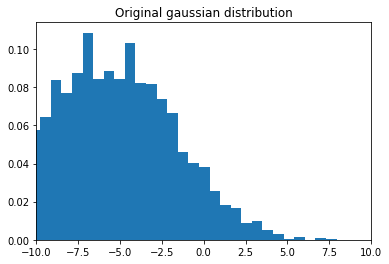

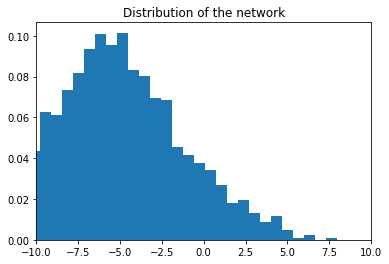

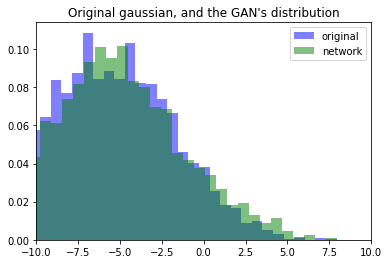

In [ ]:
with torch.no_grad():
    test_z = Variable(torch.randn(30*bs, z_dim).to(device))
    generated = G(test_z)
    generated=generated.cpu().detach().numpy()


f,ax=plt.subplots(1)
bins=50   
Data = np.random.normal(mu, std, 30*bs)
plt.hist(Data, bins, density=True)
plt.xlim(-10, 10)
plt.title('Original gaussian distribution')
plt.show()

plt.hist(generated, bins, density=True)
plt.xlim(-10, 10)
plt.title('Distribution of the network')
plt.show()

plt.hist(Data, bins, alpha=0.5, label='original', color='b', density=True)
plt.hist(generated, bins, alpha=0.5, label='network', color='g', density=True)
plt.legend(loc='upper right')
plt.xlim(-10, 10)
plt.title("Original gaussian, and the GAN's distribution")
plt.show()         